In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
data= pd.read_csv(r"C:\Users\mtice\Documents\California.csv")

# Data Structure
After loading the data, we look at the shape of the data, head of the data, and description of the variables. All variables are either Int or Float, except for "ocean_proximity" which is a categorical variable. We notice after looking at the description that "total_bedrooms" has 207 null values as well. 

In [3]:
print(data.shape)

(20640, 10)


In [4]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY
6,-122.25,37.84,52,2535,489.0,1094,514,3.6591,299200,NEAR BAY
7,-122.25,37.84,52,3104,687.0,1157,647,3.1200,241400,NEAR BAY
8,-122.26,37.84,42,2555,665.0,1206,595,2.0804,226700,NEAR BAY
9,-122.25,37.84,52,3549,707.0,1551,714,3.6912,261100,NEAR BAY


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
longitude             20640 non-null float64
latitude              20640 non-null float64
housing_median_age    20640 non-null int64
total_rooms           20640 non-null int64
total_bedrooms        20433 non-null float64
population            20640 non-null int64
households            20640 non-null int64
median_income         20640 non-null float64
median_house_value    20640 non-null int64
ocean_proximity       20640 non-null object
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [6]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Visualization
We start with histograms for each numerical variable to spot any abnormalities or other insights. We notice the following:
* The "housing_median_age" and "median_house_value" appear to have capped values. Because "median_house_value" is a the target variable, this is a problem and could lead to prediction errors.
* The scales of the variables are very different and will require feature scaling.
* Most of the histograms are right-tail heavy, especially "median_house_value" and "housing_median_age"

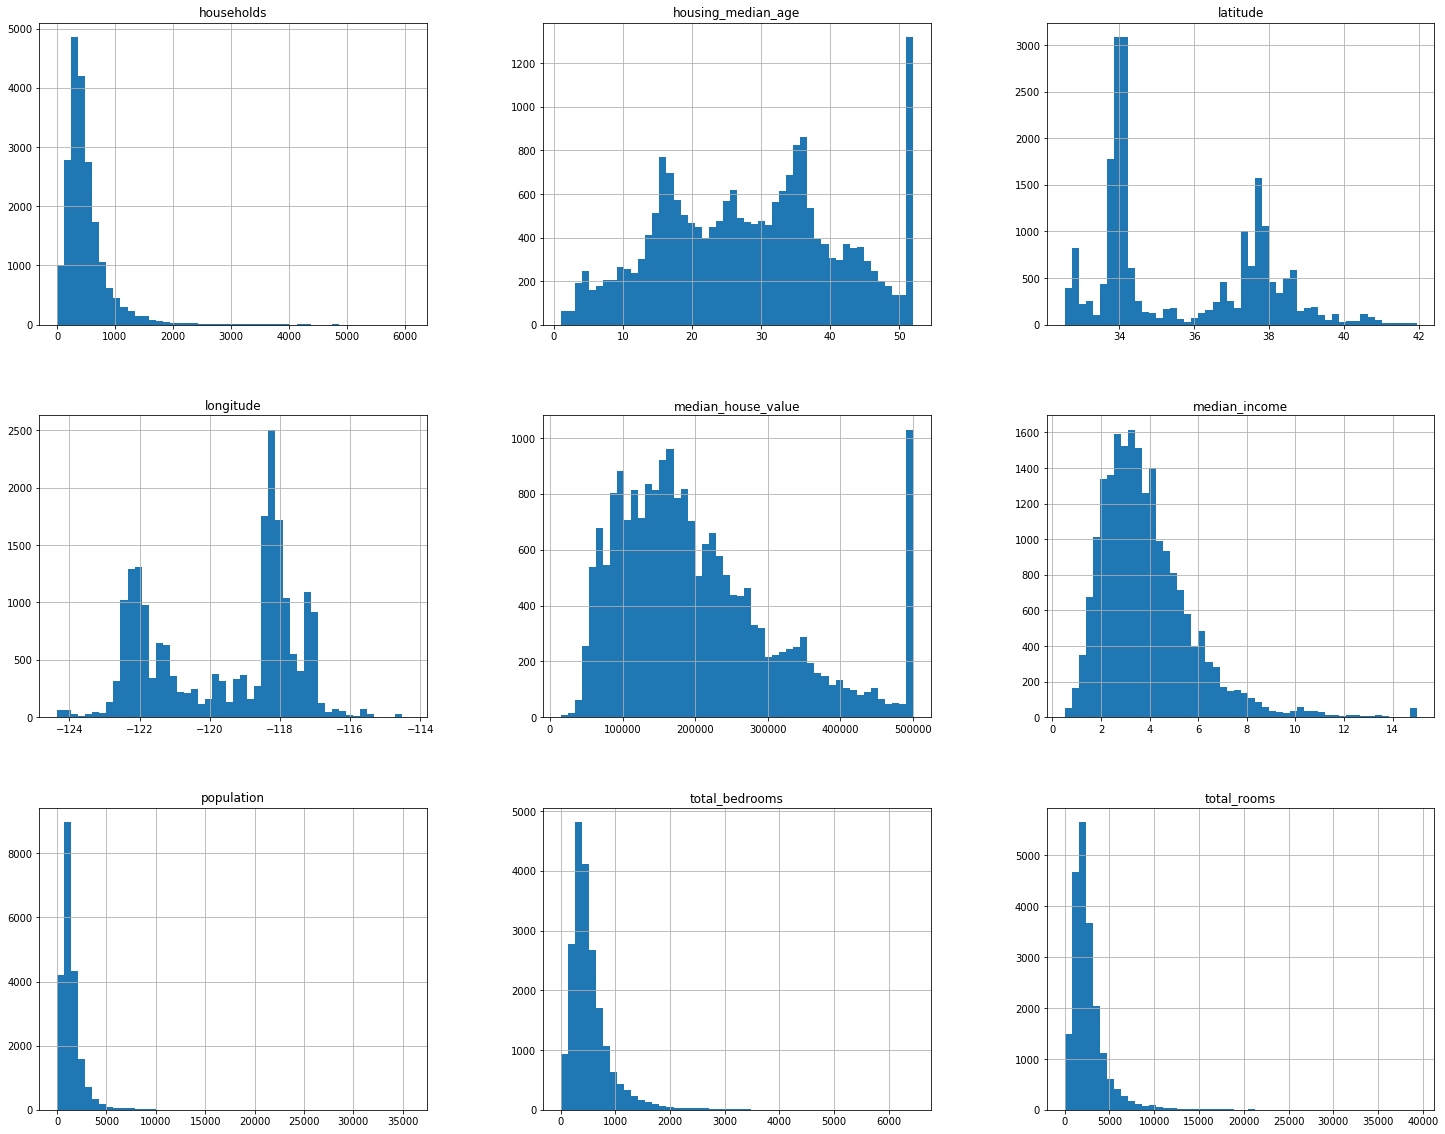

In [7]:
data.hist(bins=50, figsize=(25,20))
plt.show()

# Create Test/Train Set
I used sklearn's train_test_split and chose to make the test set size 20% of the data. Setting the random state to 42 keeps the same test set every time I run the code. I also made a copy of the training set for the cleaning/pipeline portion of project so that the training set is not changed in any way. 

In [8]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(data, test_size=0.2, random_state=42)
print(len(train_set), "train ,", len(test_set), "test")

16512 train , 4128 test


In [9]:
data = train_set.copy()

# Looking for Correlation


In [10]:
correlation = data.corr()
correlation['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.690647
total_rooms           0.133989
housing_median_age    0.103706
households            0.063714
total_bedrooms        0.047980
population           -0.026032
longitude            -0.046349
latitude             -0.142983
Name: median_house_value, dtype: float64

There are a few variables that could possibly lead to multicollinearity: 'population', 'total_bedrooms', 'total_rooms', 'households'. The total number of bedrooms and rooms are very similar; and population and households could be correlated as well. Using Pandas Scatter Matrix allows us to test this. We can clearly see a positive correlation between all of the variables. This will require dropping or combining attributes. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DBB32D978>,
      dtype=object)

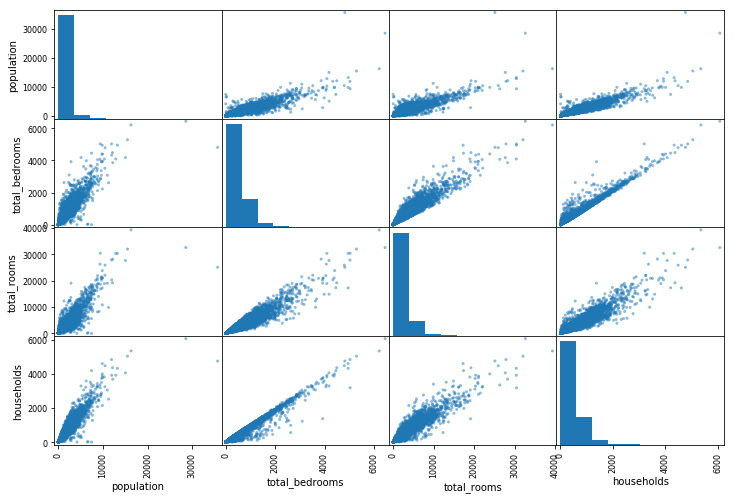

In [11]:
from pandas.plotting import scatter_matrix 
attributes = ['population', 'total_bedrooms', 'total_rooms', 'households']
scatter_matrix(data[attributes], figsize=(12,8))

# Combining Attributes
I created two new features:
* 'rooms_per_household': This is much more effective than total rooms as the number of rooms per house is a much stronger indicator of house size.
* 'population_per_household': Instead of population, this new feature is a stronger indicator of population density which is expected to have a negative correlation with housing price. 

In [12]:
data['rooms_per_household'] = data['total_rooms']/data['households']
data['population_per_household'] = data['population']/data['households']

Now the Scatter Matrix shows no correlation between these two new variables. But feature selection will determine which features should be in the final model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000015DBA888198>,
      dtype=object)

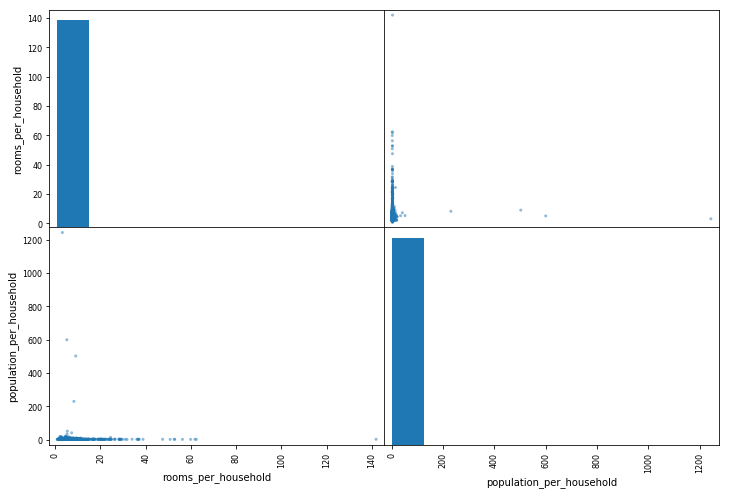

In [13]:
attributes = ['rooms_per_household', 'population_per_household']
scatter_matrix(data[attributes], figsize=(12,8))

In [14]:
correlation1 = data.corr()
correlation1['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.690647
rooms_per_household         0.158485
total_rooms                 0.133989
housing_median_age          0.103706
households                  0.063714
total_bedrooms              0.047980
population_per_household   -0.022030
population                 -0.026032
longitude                  -0.046349
latitude                   -0.142983
Name: median_house_value, dtype: float64

In [15]:
data = train_set.drop("median_house_value", axis=1) 
housing_labels = train_set["median_house_value"].copy()

# Filling in Null Values
Before filling in the nulls for 'total_bedrooms', we have to check for outliers to determine if using the mean or median will be more effective for replacement. The boxplot below shows numerous outliers, therefore median will be the most effective.

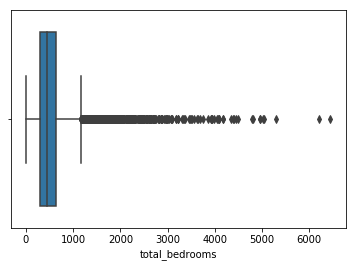

In [16]:
sb.boxplot(x=data['total_bedrooms'])

In [17]:
median = data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median, inplace=True)

# Changing Categorical Attribute to Numerical
I will bve using Scikit Learn's OneHotEncoder to transform the 'ocean_proximity' values equal to 1 when the category is '<1H OCEAN' and 0 otherwise and the same for the others. This is because the values 1-4 do not fully encapsulate the differences between the variables.

In [18]:
from sklearn import preprocessing
housing_cat = data['ocean_proximity']
housing_cat_encoded, housing_categories = housing_cat.factorize()
housing_categories

Index(['NEAR OCEAN', 'INLAND', '<1H OCEAN', 'NEAR BAY', 'ISLAND'], dtype='object')

In [19]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
housing_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))
housing_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

# Transformation Pipelines
The following steps are similar to "Hands-On Machine Learning". This is my understanding of the pipeline:
* StandardScaler normally distributes the data due to the tail-heavy nature of some features
* SimpleImputer is used to fill in the null values and I set median as the strategy due to numerous null values from before
* The ColumnTranformer combines the one-hot vectors from above and fits it to the dataset so that the dataset is now fully prepared and ready to train.

In [21]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer

num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])
data_num_tr = num_pipeline.fit_transform(data_num)

In [22]:
from sklearn.compose import ColumnTransformer
num_attribs = list(data_num)
cat_attribs = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

data_prepared = full_pipeline.fit_transform(data)
data_prepared

array([[ 1.27258656, -1.3728112 ,  0.34849025, ...,  0.        ,
         0.        ,  1.        ],
       [ 0.70916212, -0.87669601,  1.61811813, ...,  0.        ,
         0.        ,  1.        ],
       [-0.44760309, -0.46014647, -1.95271028, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 0.59946887, -0.75500738,  0.58654547, ...,  0.        ,
         0.        ,  0.        ],
       [-1.18553953,  0.90651045, -1.07984112, ...,  0.        ,
         0.        ,  0.        ],
       [-1.41489815,  0.99543676,  1.85617335, ...,  0.        ,
         1.        ,  0.        ]])